<a href="https://colab.research.google.com/github/vinay-554/Gender-Voice-Recognition/blob/main/Copy_of_Machine_Learning_July_Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name:
Machine Learning project-gender recognition based on voice

# Problem Statement:
Create a Classification model to predict the gender(male or female) based on different acoustic parameters


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("voice.csv")
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [ ]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
df.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


In [ ]:
#different attributes
print(df.columns,end=" ")

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object') 

#remove/handle null values (if any)

In [ ]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [ ]:
df.info() #info about each attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
print("total:",df.label.count())

total: 3168


In [ ]:
#Data Insight And  Adding Label To Male/Female
a=df.label.value_counts()
print(a)

male      1584
female    1584
Name: label, dtype: int64


#Depict Percentage distribution of label on a pie chart

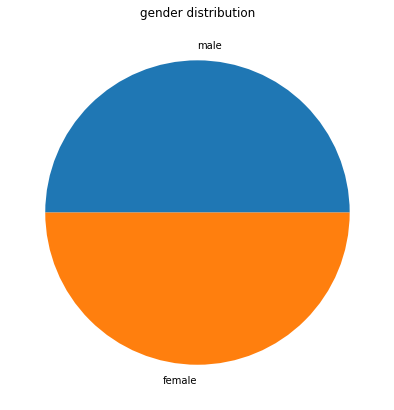

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
#creating dataset
gender=['male','female']
data=[1584,1584]
#creating plot
fig=plt.figure(figsize=(10,7))
plt.pie(data,labels=gender,colors=None)
plt.title('gender distribution')
#show plot
plt.show()


In [ ]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


#split the dataset training and testing data with test size=20%

In [ ]:
#our label feature has two values that is "male" and "female" we need to convert into integers for classification
df.label=[1 if each == "female" else 0 for each in df.label]


In [ ]:
df.label

0       0
1       0
2       0
3       0
4       0
       ..
3163    1
3164    1
3165    1
3166    1
3167    1
Name: label, Length: 3168, dtype: int64

In [ ]:
x=df.drop(['label'],axis='columns')
y=df.label.values
#importing class for splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
algo_names=[]
algo_scores=[]

In [ ]:
x_train.shape

(2534, 20)

In [ ]:
x_test.shape

(634, 20)

In [ ]:
y_train.shape

(2534,)

In [ ]:
y_test.shape

(634,)

In [ ]:
x_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
791,0.169951,0.058802,0.179331,0.113743,0.214412,0.100669,1.518671,6.020674,0.934683,0.465467,0.093696,0.169951,0.094131,0.019925,0.145455,0.911765,0.007812,6.929688,6.921875,0.196183
1893,0.195861,0.057153,0.205355,0.181234,0.234366,0.053132,2.004903,8.716056,0.889968,0.374785,0.049872,0.195861,0.139459,0.016860,0.250000,0.236753,0.054688,0.750000,0.695312,0.259448
742,0.169633,0.057877,0.189330,0.106650,0.209826,0.103176,2.485530,11.331393,0.907188,0.415658,0.207047,0.169633,0.096447,0.015779,0.213333,0.174479,0.093750,0.562500,0.468750,0.132500
1461,0.179274,0.057481,0.190539,0.122573,0.223651,0.101079,0.809674,2.789713,0.929229,0.423772,0.097593,0.179274,0.104121,0.047478,0.268156,0.389476,0.023438,0.656250,0.632812,0.146991
1246,0.183552,0.052912,0.185812,0.142883,0.222014,0.079130,1.151453,4.205276,0.924422,0.375796,0.220732,0.183552,0.123960,0.047151,0.279070,0.777656,0.023438,8.015625,7.992188,0.091258


In [ ]:
x_test.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
322,0.154434,0.061416,0.166399,0.098671,0.202102,0.103431,3.019968,12.758842,0.897214,0.459831,0.099536,0.154434,0.094673,0.014205,0.103093,0.524774,0.205078,0.708008,0.502930,0.306149
1221,0.198480,0.063197,0.199937,0.137125,0.258325,0.121201,2.464330,10.059033,0.861033,0.275471,0.256556,0.198480,0.132247,0.049485,0.266667,1.444973,0.140625,12.023438,11.882812,0.095332
1498,0.161514,0.074179,0.182566,0.102510,0.226109,0.123598,1.318529,4.686746,0.962416,0.726932,0.098605,0.161514,0.113916,0.049689,0.275862,0.642663,0.046875,4.312500,4.265625,0.186896
1745,0.187125,0.031593,0.185277,0.170122,0.199296,0.029175,2.221711,7.246410,0.840933,0.212158,0.170501,0.187125,0.178872,0.081633,0.231884,0.191840,0.164062,0.234375,0.070312,0.104575
2388,0.213095,0.037241,0.217306,0.199241,0.232713,0.033472,2.168188,7.224561,0.843428,0.256797,0.227932,0.213095,0.160391,0.047291,0.277457,1.227764,0.210938,7.757812,7.546875,0.125086


In [ ]:
import numpy as np
y_train

array(['male', 'female', 'male', ..., 'female', 'female', 'male'],
      dtype=object)

In [ ]:
y_test

array(['male', 'male', 'male', 'female', 'female', 'female', 'female',
       'female', 'male', 'male', 'male', 'female', 'male', 'female',
       'female', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'female', 'female', 'female', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'male', 'male', 'female', 'male',
       'male', 'female', 'female', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'female', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'female', 'female', 'female', 'male', 'female', 'male',
       'female', 'female', 'male', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'male', 'female',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'fe

#Applying Different  Modules

1)Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_tree=DecisionTreeClassifier(random_state=100)
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

In [ ]:
print('Training score',dec_tree.score(x_train,y_train))
print('Testing score',dec_tree.score(x_test,y_test))

Training score 1.0
Testing score 0.9558359621451105


In [ ]:
p1=dec_tree.predict(x_test)
print(p1)


['male' 'male' 'male' 'female' 'female' 'female' 'female' 'female' 'male'
 'male' 'male' 'female' 'male' 'female' 'female' 'female' 'female' 'male'
 'male' 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'male'
 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male

*generate confusion matrix and classfication report*

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
cm=confusion_matrix(y_test,p1)
print(cm)
print(classification_report(y_test,p1))
print("accuracy score",accuracy_score(y_test,p1))

[[303  15]
 [ 13 303]]
              precision    recall  f1-score   support

      female       0.96      0.95      0.96       318
        male       0.95      0.96      0.96       316

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

accuracy score 0.9558359621451105


In [ ]:
from sklearn.tree import plot_tree


In [ ]:
#fn=feature_names,cn=class_names
fn=x_train.columns
cn=['female','male']
print(fn)
print(cn)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')
['female', 'male']


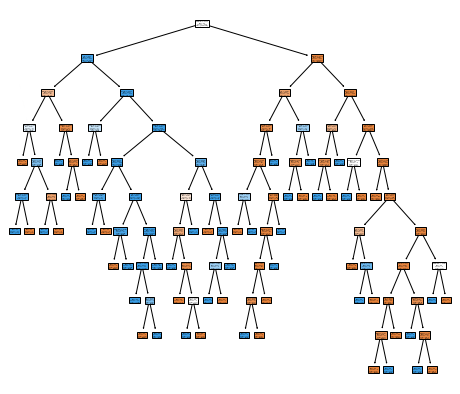

In [ ]:
plt.figure(figsize=(8,7))
plot_tree(dec_tree,feature_names=fn,class_names=cn,filled=True)
plt.show()

2)Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_forest=RandomForestClassifier(random_state=100)
rand_forest.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [ ]:
print('Training score',rand_forest.score(x_train,y_train))
print('Testing score',rand_forest.score(x_test,y_test))

Training score 1.0
Testing score 0.9747634069400631


In [ ]:
p2=rand_forest.predict(x_test)
print(p2)

[0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1
 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0
 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0
 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1
 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0
 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1
 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1
 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 0 1 0 1 0 0 1 1 0 1 1 0 

Generate confusion matrix and classification report

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
cm=confusion_matrix(y_test,p2)
print(cm)
print(classification_report(y_test,p2))
print("Accuracy score",accuracy_score(y_test,p2))

[[307   9]
 [  7 311]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       316
           1       0.97      0.98      0.97       318

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Accuracy score 0.9747634069400631


3) KNeighborsClassifier Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_neighbors=KNeighborsClassifier(n_neighbors=100)
k_neighbors.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
print("training score",k_neighbors.score(x_train,y_train))
print("test score",k_neighbors.score(x_test,y_test))

training score 0.6886345698500395
test score 0.7034700315457413


In [ ]:
p3=k_neighbors.predict(x_test)
print(p3)

[0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1
 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0
 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1
 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0
 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0
 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1
 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 1 1 1 0 0 0 0 1 0 0 0 0 

Generate Confusion matrix and Classification report

In [ ]:
cm=confusion_matrix(y_test,p3)
print(cm)
print(classification_report(y_test,p3))
print("Accuracy score",accuracy_score(y_test,p3))

[[236  80]
 [108 210]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       316
           1       0.72      0.66      0.69       318

    accuracy                           0.70       634
   macro avg       0.71      0.70      0.70       634
weighted avg       0.71      0.70      0.70       634

Accuracy score 0.7034700315457413


4) LogisticRegression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
L_Regression=LogisticRegression(max_iter=1000)
L_Regression.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print("training score",L_Regression.score(x_train,y_train))
print("test score",L_Regression.score(x_test,y_test))

training score 0.9116022099447514
test score 0.8958990536277602


In [ ]:
p4=L_Regression.predict(x_test)
print(p4)

['male' 'male' 'male' 'female' 'female' 'female' 'female' 'female' 'male'
 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'female'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'female'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'ma

Generate Confusion Matrix Classfication Report

In [ ]:
cm=confusion_matrix(y_test,p4)
print(cm)
print(classification_report(y_test,p4))
print("Accuracy score",accuracy_score(y_test,p4))

[[266  52]
 [ 14 302]]
              precision    recall  f1-score   support

      female       0.95      0.84      0.89       318
        male       0.85      0.96      0.90       316

    accuracy                           0.90       634
   macro avg       0.90      0.90      0.90       634
weighted avg       0.90      0.90      0.90       634

Accuracy score 0.8958990536277602


5)Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv_classifier=SVC(kernel='linear',C=1)
sv_classifier.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [ ]:
print("training score",sv_classifier.score(x_train,y_train))
print("test score",sv_classifier.score(x_test,y_test))

training score 0.9238358326756116
test score 0.9069400630914827


In [ ]:
p5=sv_classifier.predict(x_test)
print(p5)

['male' 'male' 'male' 'female' 'female' 'female' 'female' 'female' 'male'
 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female'
 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'female'
 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 

Generate Confusion Matrix And Classification Report

In [ ]:
cm=confusion_matrix(y_test,p5)
print(cm)
print(classification_report(y_test,p5))
print("Accuracy score",accuracy_score(y_test,p5))

[[270  48]
 [ 11 305]]
              precision    recall  f1-score   support

      female       0.96      0.85      0.90       318
        male       0.86      0.97      0.91       316

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634

Accuracy score 0.9069400630914827


#Report the model with best accuracy
Based on precision,recall,f1-call,support,Accuracy_score,we can say that Random Forest Classifier and KNeighbors classifier model is best sutable for this problem,where we are predicting the person as male and female based upon their voice signals
